In [2]:
import polars as pl
import numpy as np
import os, re, math
import matplotlib.pyplot as plt
import seaborn as sns
import typing
import dataclasses
import scipy.stats

In [3]:
# df = pl.read_parquet("/home/exyi/Downloads/anglepairs/cWW-G-C-filtered.parquet")
# df = pl.read_parquet("/home/exyi/code/rna-ml/pairclusters/out/plots/cWW-G-C-filtered.parquet")
df = pl.read_parquet("/home/exyi/code/rna-ml/pairclusters/out/plots/tSs-A-G.parquet")
dfAU = pl.read_parquet("/home/exyi/Downloads/anglepairs/cWW-A-U-filtered.parquet")
df.schema

OrderedDict([('pdbid', String),
             ('model', Int64),
             ('chain1', String),
             ('chain2', String),
             ('res1', String),
             ('res2', String),
             ('nr1', Int64),
             ('nr2', Int64),
             ('alt1', String),
             ('alt2', String),
             ('ins1', String),
             ('ins2', String),
             ('symmetry_operation', String),
             ('type', String),
             ('hb_0_length', Float32),
             ('hb_0_donor_angle', Float32),
             ('hb_0_acceptor_angle', Float32),
             ('hb_0_donor_OOPA', Float32),
             ('hb_0_acceptor_OOPA', Float32),
             ('hb_1_length', Float32),
             ('hb_1_donor_angle', Float32),
             ('hb_1_acceptor_angle', Float32),
             ('hb_1_donor_OOPA', Float32),
             ('hb_1_acceptor_OOPA', Float32),
             ('hb_2_length', Float32),
             ('hb_2_donor_angle', Float32),
             ('hb_2_acceptor_a

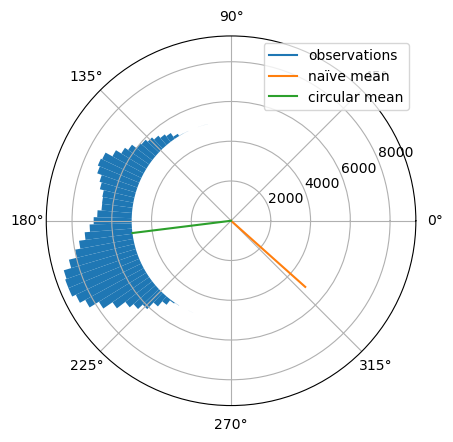

In [27]:
plt.figure(figsize=(4.8, 4.8))
ax = plt.subplot(111, polar=True)
N = 120
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
# data = df["C1_C1_euler_psi"].drop_nulls().to_numpy()
data = df["C1_C1_roll2"].drop_nulls().to_numpy()
normal_mean = np.mean(data)
angular_mean = np.angle(np.mean(np.exp(1j * np.radians(data))), deg=True)
bins = np.zeros(len(theta), dtype=np.int32)
for x in data:
    bins[math.floor((x%360) / 360 * N)] += 1
bars = ax.bar(theta, bins, width=2*math.pi/N, bottom=5_000)
ax.plot([], [])
ax.plot(np.radians([ normal_mean, normal_mean ]), [0, 5_000])
ax.plot(np.radians([ angular_mean, angular_mean ]), [0, 5_000])
ax.legend(["observations", "naïve mean", "circular mean" ])
plt.savefig("out/angular-stats-polar-histogram.svg")

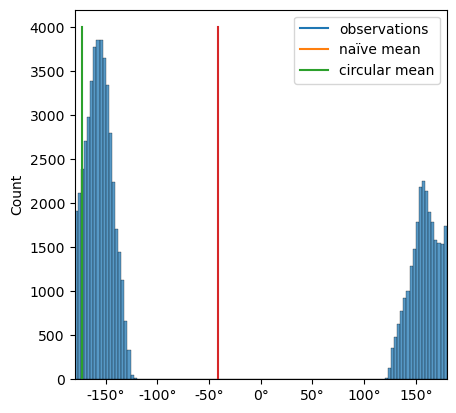

In [29]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize=(4.8, 4.8))
sns.histplot(data, bins=N)
plt.plot([], [])
plt.plot([], [])
plt.plot([ angular_mean, angular_mean ], [0, 4000])
plt.plot([ normal_mean, normal_mean ], [0, 4000])
plt.legend(["observations", "naïve mean", "circular mean" ])
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d°'))
plt.xlim(-180, 180)
plt.savefig("out/angular-stats-cartesian-histogram.svg")

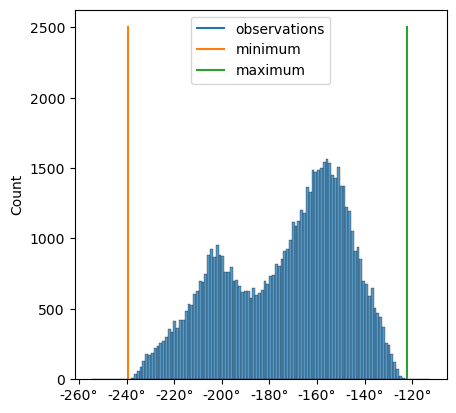

In [26]:
plt.figure(figsize=(4.8, 4.8))
on_circle = np.exp(1j * np.radians(data))
mean_complex = np.mean(on_circle)
around_zero = np.angle(on_circle / mean_complex, deg=True) # multiplication is rotation, division is rotation back
data_normalized = around_zero + np.angle(mean_complex, deg=True)
sns.histplot(data_normalized, bins=N)
plt.plot([], [])
plt.plot([ np.quantile(data_normalized, 0.0001), np.quantile(data_normalized, 0.0001) ], [0, 2500])
plt.plot([ np.quantile(data_normalized, 0.9999), np.quantile(data_normalized, 0.9999) ], [0, 2500])
plt.legend(["observations", "minimum", "maximum" ])
# plt.plot([ np.quantile(data_normalized, 0.5), np.quantile(data_normalized, 0.5) ], [0, 2500])
# plt.plot([ angular_mean, angular_mean ], [0, 2500])
# plt.suptitle("Data is centered on mean instead of zero")
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d°'))
plt.savefig("out/angular-stats-recenteredcartesian-histogram.svg")